In [96]:
import os
import glob
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

import sys
sys.path.insert(0,'..')

from plot_functions.plot_map import plot_map

In [5]:
# Select run to plot
run = '038'
basedir = os.environ['SCRATCH']+'/MiMA/runs/'
rundir = basedir + run + '/'
print(rundir)

print(glob.glob(rundir+'*.nc'))
filename = 'atmos_daily'
dataset = nc.Dataset(rundir+filename+'.nc', 'r')

lon = dataset['lon']
lat = dataset['lat']
time = dataset['time']
pfull = dataset['pfull']
ucomp = dataset['ucomp']

/scratch/users/lauraman/MiMA/runs/038/
['/scratch/users/lauraman/MiMA/runs/038/atmos_daily.nc', '/scratch/users/lauraman/MiMA/runs/038/atmos_avg.nc']


## Plot mean u at 3 different heights in stratosphere / troposphere

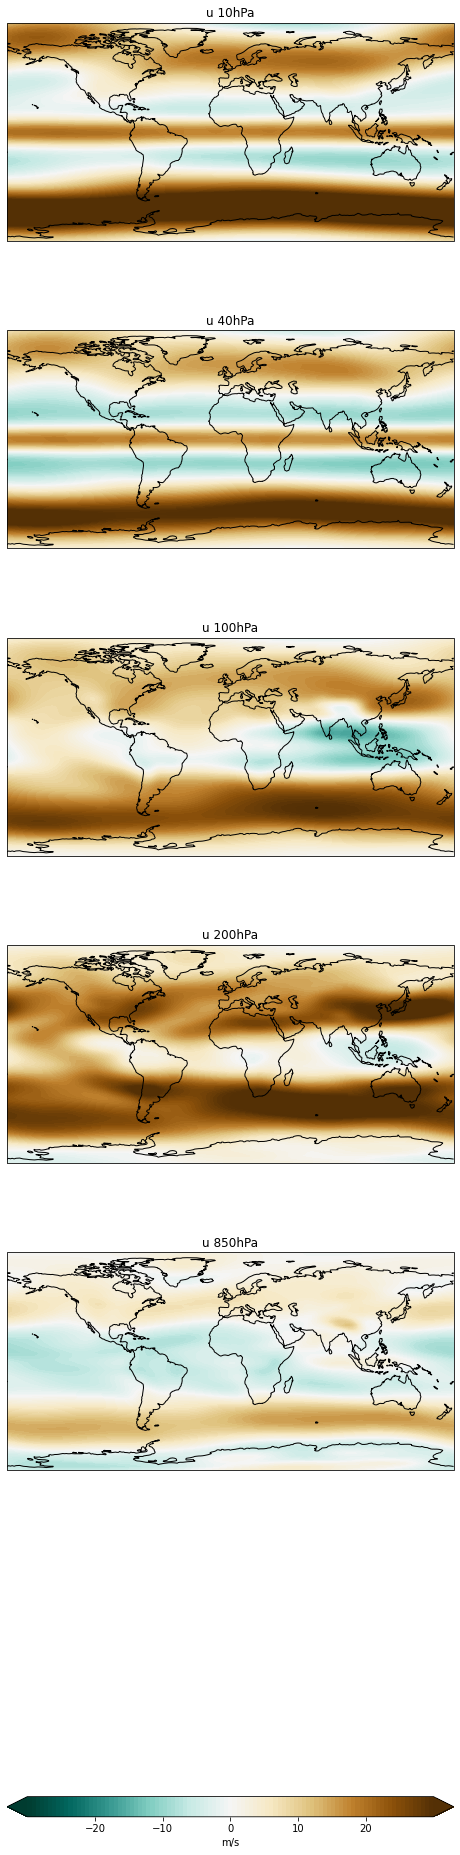

In [122]:
model_heights = ['10hPa', '40hPa', '100hPa', '200hPa', '850hPa']
model_levels = [13, 19, 23, 28, 37]

nrows = len(model_heights)
ncols = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(8, 8*nrows), gridspec_kw = {'wspace':0.05, 'hspace':0.05}, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, sharex = True)
axs = axs.flatten()

for i in range(len(model_heights)):
    u_plot = ucomp[360:, model_levels[i], :, :].mean(axis=0)

    plot_map(lon, lat, u_plot, ax=axs[i], levels = np.linspace(-30, 30, 100), 
             title = 'u {}'.format(model_heights[i]))
cbar = plt.colorbar(ax=axs, ticks=np.arange(-20, 20.5, 10), location='bottom', label='m/s',
                        orientation='horizontal')


In [110]:
from clim_functions.MiMA_height_indices import MiMA_height_indices

In [111]:
print(MiMA_height_indices)

{'10hPa': 13, '20hPa': 16, '27hPa': 17, '40hPa': 19, '77hPa': 22, '100hPa': 23, '200hPa': 28, '850hPa': 37}


In [113]:
keys = MiMA_height_indices.keys()
for key in keys:
    print(key, pfull[MiMA_height_indices[key]])

10hPa 10.94954
20hPa 21.556078
27hPa 26.834885
40hPa 41.14669
77hPa 75.95193
100hPa 92.42645
200hPa 230.64043
850hPa 821.39655


In [118]:
pfull[37]

masked_array(data=821.39655,
             mask=False,
       fill_value=1e+20,
            dtype=float32)